In [1]:
# Code adapted from Machine Learning Engineering (Cornell Tech 2025)
import torch
import numpy as np
import random

def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [2]:
from google.colab import drive
import sys
import os

# --- 1. Mount Drive ---
drive.mount('/content/drive')

# --- 2. Define Paths ---
# Path to the source code (loaders.py) - REMAINS ON DRIVE
DRIVE_CODE_PATH = '/content/drive/MyDrive/GoogleColab/dataforsptransformer/'

# Path to the zipped data file on Drive
ZIP_SOURCE_PATH = os.path.join(DRIVE_CODE_PATH, 'crc_markers.zip')

# Local disk folder where the FAST images will be unzipped
FAST_DATA_PATH = '/content/fast_data/'

# --- 3. Unzip Data (Performance Fix) ---
if not os.path.exists(FAST_DATA_PATH):
    print(f"🚀 Unzipping data from Drive to fast local disk: {FAST_DATA_PATH}")
    !mkdir -p "$FAST_DATA_PATH"
    # The -q flag silences the output. -d sets the destination directory.
    !unzip -q "$ZIP_SOURCE_PATH" -d "$FAST_DATA_PATH"

    print("✅ Data transfer complete. Starting new batch load test.")
else:
    print("Fast data directory already exists.")


# --- 4. Set Final Variables ---
# PROJECT_DIR for the rest of your notebook now points to the FAST images
PROJECT_DIR = FAST_DATA_PATH

# Add the Drive path for Python to find 'loaders.py' and other modules
if DRIVE_CODE_PATH not in sys.path:
    sys.path.append(DRIVE_CODE_PATH)
    print(f"✅ Added {DRIVE_CODE_PATH} to Python system path.")

Mounted at /content/drive
🚀 Unzipping data from Drive to fast local disk: /content/fast_data/
✅ Data transfer complete. Starting new batch load test.
✅ Added /content/drive/MyDrive/GoogleColab/dataforsptransformer/ to Python system path.


In [5]:
from google.colab import files

# This will open a 'Choose Files' button in your output cell
# Choose train_helpers.py
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving graphformer.py to graphformer.py
User uploaded file "graphformer.py" with length 8437 bytes


In [9]:
!python3 data_cleaning.py

Computing KNN (k=5) for each graph separately...
Found 140 unique graphs
KNN computation complete! Total cells: 258385

Sample of cleaned data:
               GraphID  CellID  ...  Z:Z                                    KNN
0  reg001_A 1 reg001 1       0  ...   10            [22144, 50530, 3, 98132, 2]
1  reg001_A 1 reg001 1       1  ...   10  [33870, 50531, 118271, 33869, 118273]
2  reg001_A 1 reg001 1       2  ...   10            [3, 98132, 50530, 0, 22144]
3  reg001_A 1 reg001 1       3  ...   10            [50530, 98132, 2, 0, 22144]
4  reg001_A 1 reg001 1       4  ...   10      [118281, 98134, 118276, 5, 98140]

[5 rows x 6 columns]
Number cells: 258385, Number unique CellIDs 258385


In [10]:
import pandas as pd

df = pd.read_csv("/content/fast_data/CRC_clusters_neighborhoods_markers_cleaned.csv")
df.head()

,CellID,CD44 - stroma:Cyc_2_ch_2,FOXP3 - regulatory T cells:Cyc_2_ch_3,CD8 - cytotoxic T cells:Cyc_3_ch_2,p53 - tumor suppressor:Cyc_3_ch_3,GATA3 - Th2 helper T cells:Cyc_3_ch_4,CD45 - hematopoietic cells:Cyc_4_ch_2,T-bet - Th1 cells:Cyc_4_ch_3,beta-catenin - Wnt signaling:Cyc_4_ch_4,HLA-DR - MHC-II:Cyc_5_ch_2,...,CD68+Ki67+,CD68+PD-1+,CD8+ICOS+,CD8+Ki67+,CD8+PD-1+,Treg-ICOS+,Treg-Ki67+,Treg-PD-1+,GraphID,KNN
0,0,1.843591,17.398706,0.000000,59.391884,35.244526,0.000000,45.537239,258.346375,0.000000,...,0,0,0,0,0,0,0,0,reg001_A 1 reg001 1,"[22144, 50530, 3, 98132, 2]"
1,1,30.284525,18.375738,74.695236,271.420136,30.313547,0.000000,8.821254,668.978577,0.000000,...,0,0,0,0,0,0,0,0,reg001_A 1 reg001 1,"[33870, 50531, 118271, 33869, 118273]"
2,2,139.488510,249.746979,85.556976,705.369324,49.865829,8.435891,179.875778,480.811737,3.066591,...,0,0,0,0,0,0,0,0,reg001_A 1 reg001 1,"[3, 98132, 50530, 0, 22144]"
3,3,20.596886,81.759758,0.000000,0.000000,34.731583,0.000000,122.186234,145.830063,0.000000,...,0,0,0,0,0,0,0,0,reg001_A 1 reg001 1,"[50530, 98132, 2, 0, 22144]"
4,4,67.328728,122.195473,11.028284,325.076691,93.776245,0.000000,323.319305,987.071655,0.000000,...,0,0,0,0,0,0,0,0,reg001_A 1 reg001 1,"[118281, 98134, 118276, 5, 98140]"


In [11]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00


In [12]:
df.columns

Index(['CellID', 'CD44 - stroma:Cyc_2_ch_2',
       'FOXP3 - regulatory T cells:Cyc_2_ch_3',
       'CD8 - cytotoxic T cells:Cyc_3_ch_2',
       'p53 - tumor suppressor:Cyc_3_ch_3',
       'GATA3 - Th2 helper T cells:Cyc_3_ch_4',
       'CD45 - hematopoietic cells:Cyc_4_ch_2', 'T-bet - Th1 cells:Cyc_4_ch_3',
       'beta-catenin - Wnt signaling:Cyc_4_ch_4', 'HLA-DR - MHC-II:Cyc_5_ch_2',
       'PD-L1 - checkpoint:Cyc_5_ch_3', 'Ki67 - proliferation:Cyc_5_ch_4',
       'CD45RA - naive T cells:Cyc_6_ch_2', 'CD4 - T helper cells:Cyc_6_ch_3',
       'CD21 - DCs:Cyc_6_ch_4', 'MUC-1 - epithelia:Cyc_7_ch_2',
       'CD30 - costimulator:Cyc_7_ch_3', 'CD2 - T cells:Cyc_7_ch_4',
       'Vimentin - cytoplasm:Cyc_8_ch_2', 'CD20 - B cells:Cyc_8_ch_3',
       'LAG-3 - checkpoint:Cyc_8_ch_4', 'Na-K-ATPase - membranes:Cyc_9_ch_2',
       'CD5 - T cells:Cyc_9_ch_3', 'IDO-1 - metabolism:Cyc_9_ch_4',
       'Cytokeratin - epithelia:Cyc_10_ch_2',
       'CD11b - macrophages:Cyc_10_ch_3', 'CD56 - NK cells:C

# Setup Training Environment

In [13]:
# Add current directory to path so we can import training.py
import sys
import os
sys.path.append(os.getcwd())

from training import train_graphformer, simple_neighbor_average_baseline

# Start and end protein columns as identified in the notebook
START_PROTEIN = 'CD44 - stroma:Cyc_2_ch_2'
END_PROTEIN = 'CD138 - plasma cells:Cyc_21_ch_3'
protein_cols = df.columns[df.columns.get_loc(START_PROTEIN) : df.columns.get_loc(END_PROTEIN)+1].tolist()

## Level 1 Hyperparameter Optimization

We optimize the core capacity and stability parameters first:
1. **Learning Rate**: Determines convergence speed and stability.
2. **Max Neighbors (k)**: Determines the biological spatial context size.
3. **Number of Layers**: Determines the depth of the graph receptive field.


Testing Config: {'lr': 0.001, 'max_neighbors': 5, 'num_layers': 2}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: 0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=5) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.2004
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.2344
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.2671
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.2937
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2948
  FOXP3 - regulatory T cells:Cyc_2_ch_3              R²: -0.3081
  BCL-2 - apoptosis:Cyc_11_ch_3                      R²: -0.3108
  HLA-DR - MHC-II:Cyc_5_ch_2                         R²: -0.3111
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.3176
  

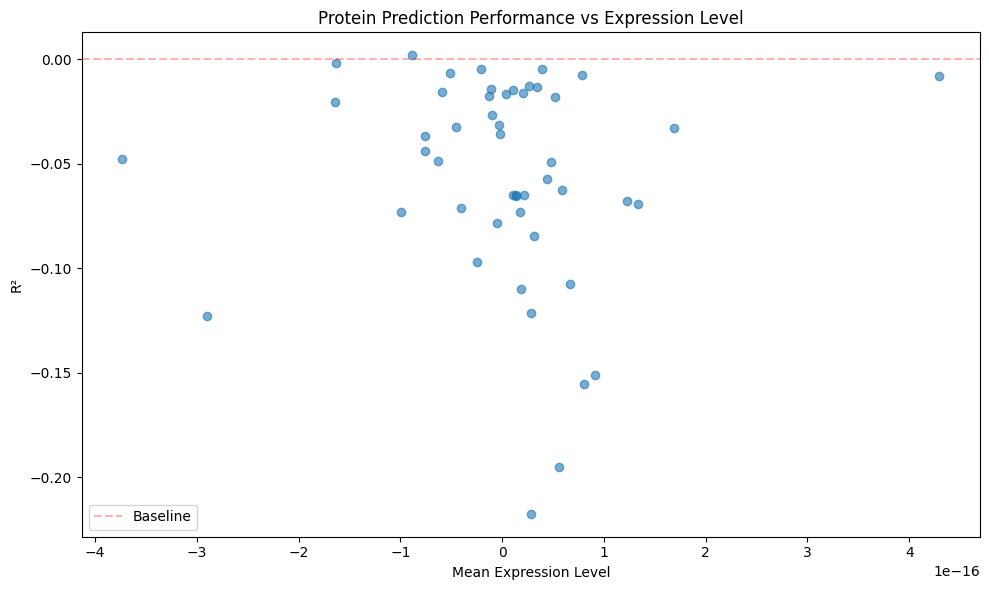


Correlation between mean expression and R²: -0.0556
Config {'lr': 0.001, 'max_neighbors': 5, 'num_layers': 2} achieved best R2: -0.0352

Testing Config: {'lr': 0.001, 'max_neighbors': 5, 'num_layers': 3}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: -0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=5) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.2004
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.2344
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.2671
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.2937
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2948
  FOXP3 - regulatory T cells:Cyc_2_ch_3              R²: -0.3081
  BCL-2 - apoptosis:Cyc_11_ch_3                      R²: -0

KeyboardInterrupt: 

In [14]:
import itertools

# Level 1 Hyperparameter Grid
hparams = {
    'lr': [1e-3, 1e-4, 5e-5],
    'max_neighbors': [5, 10, 20],
    'num_layers': [2, 3, 4]
}

results = []

keys, values = zip(*hparams.items())
for v in itertools.product(*values):
    params = dict(zip(keys, v))

    print(f"\nTesting Config: {params}")

    # Run a short training burst (e.g., 5-10 epochs) for faster sweeping
    model, train_ds, test_ds = train_graphformer(
        df,
        protein_start_col=START_PROTEIN,
        protein_end_col=END_PROTEIN,
        normalize=True,
        hidden_dim=128,  # Fixed for Level 1
        num_heads=4,     # Fixed for Level 1
        num_epochs=10,   # Shorter training for optimization
        **params
    )

    # Evaluate performance (using final R2 from training function logs or manual retrieval)
    # Note: train_graphformer returns the best model based on R2 internally
    import torch
    checkpoint = torch.load('best_graphformer_model.pt', weights_only=False)
    best_r2_val = checkpoint['r2']

    results.append({**params, 'best_r2': best_r2_val})
    print(f"Config {params} achieved best R2: {best_r2_val:.4f}")

# Display and sort results
results_df = pd.DataFrame(results).sort_values(by='best_r2', ascending=False)
print("\nHyperparameter Optimization Results (Sorted by R2):")
print(results_df)


Testing Config: {'lr': 0.0001, 'max_neighbors': 5, 'num_layers': 2}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: 0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=5) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.2004
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.2344
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.2671
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.2937
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2948
  FOXP3 - regulatory T cells:Cyc_2_ch_3              R²: -0.3081
  BCL-2 - apoptosis:Cyc_11_ch_3                      R²: -0.3108
  HLA-DR - MHC-II:Cyc_5_ch_2                         R²: -0.3111
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.3176
 

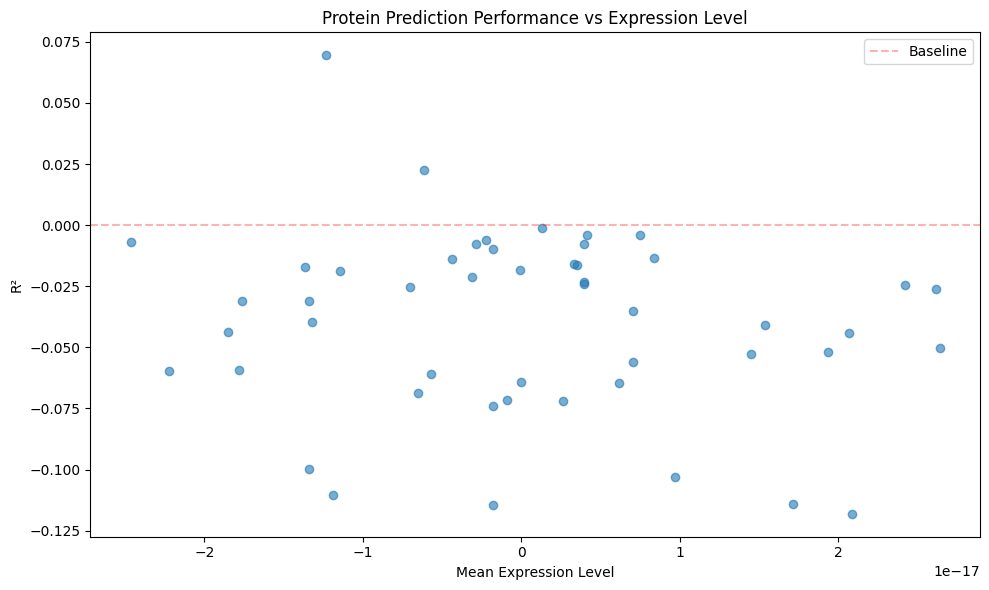


Correlation between mean expression and R²: -0.1584
Config {'lr': 0.0001, 'max_neighbors': 5, 'num_layers': 2} achieved best R2: -0.0253

Testing Config: {'lr': 0.0001, 'max_neighbors': 5, 'num_layers': 3}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: -0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=5) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.2004
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.2344
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.2671
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.2937
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2948
  FOXP3 - regulatory T cells:Cyc_2_ch_3              R²: -0.3081
  BCL-2 - apoptosis:Cyc_11_ch_3                      R²: 

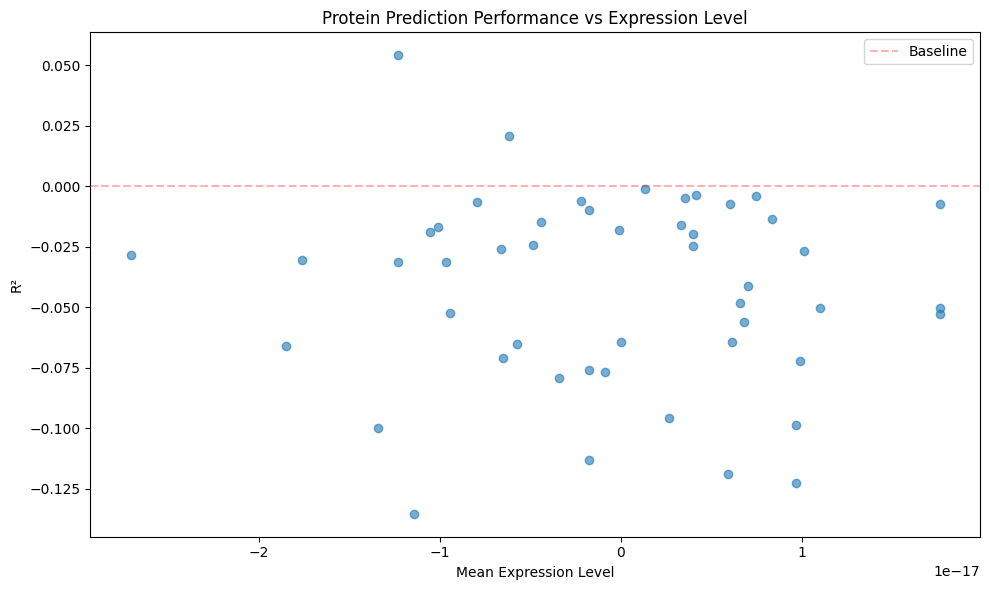


Correlation between mean expression and R²: -0.0759
Config {'lr': 0.0001, 'max_neighbors': 5, 'num_layers': 3} achieved best R2: -0.0274

Testing Config: {'lr': 0.0001, 'max_neighbors': 5, 'num_layers': 4}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: -0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=5) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.2004
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.2344
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.2671
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.2937
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2948
  FOXP3 - regulatory T cells:Cyc_2_ch_3              R²: -0.3081
  BCL-2 - apoptosis:Cyc_11_ch_3                      R²: 

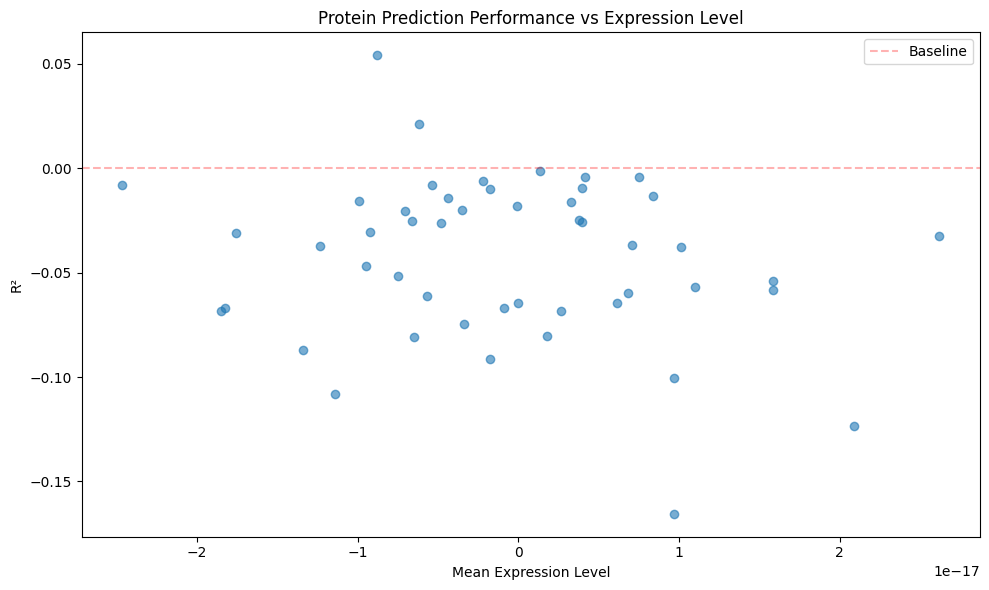


Correlation between mean expression and R²: -0.1891
Config {'lr': 0.0001, 'max_neighbors': 5, 'num_layers': 4} achieved best R2: -0.0264

Testing Config: {'lr': 0.0001, 'max_neighbors': 10, 'num_layers': 2}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: -0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=10) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.1281
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.1530
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.1621
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.1822
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.1946
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2073
  HLA-DR - MHC-II:Cyc_5_ch_2                         R²

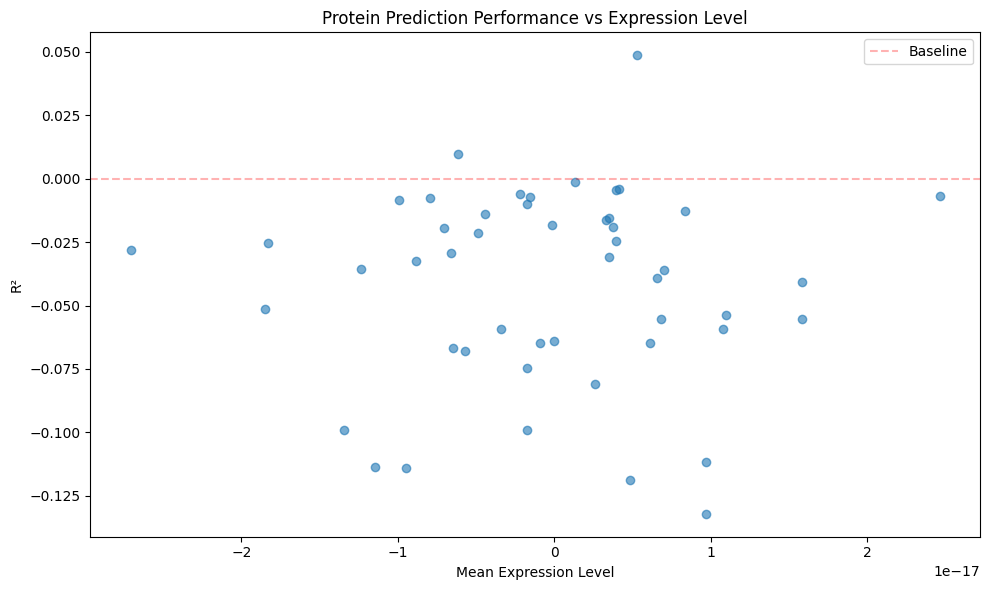


Correlation between mean expression and R²: 0.0103
Config {'lr': 0.0001, 'max_neighbors': 10, 'num_layers': 2} achieved best R2: -0.0261

Testing Config: {'lr': 0.0001, 'max_neighbors': 10, 'num_layers': 3}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: 0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=10) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.1281
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.1530
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.1621
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.1822
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.1946
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2073
  HLA-DR - MHC-II:Cyc_5_ch_2                         R²:

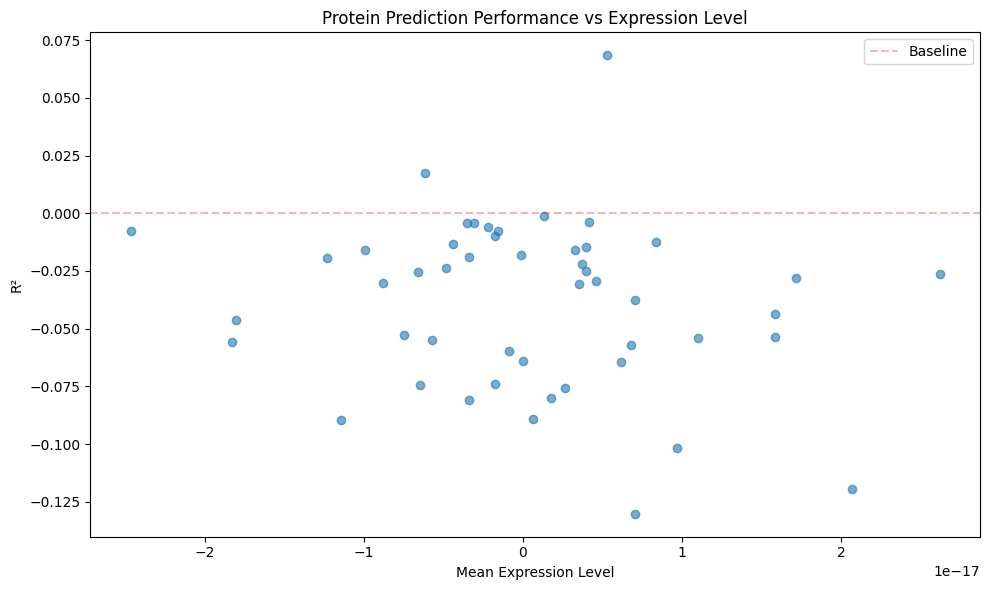


Correlation between mean expression and R²: -0.1622
Config {'lr': 0.0001, 'max_neighbors': 10, 'num_layers': 3} achieved best R2: -0.0245

Testing Config: {'lr': 0.0001, 'max_neighbors': 10, 'num_layers': 4}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: 0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=10) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.1281
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.1530
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.1621
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.1822
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.1946
  CD8 - cytotoxic T cells:Cyc_3_ch_2                 R²: -0.2073
  HLA-DR - MHC-II:Cyc_5_ch_2                         R²

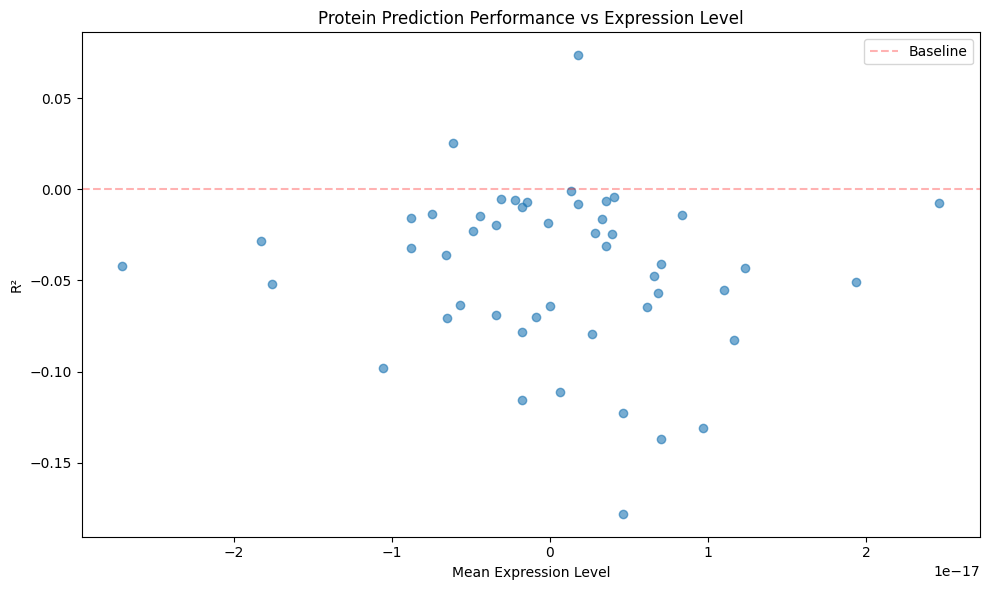


Correlation between mean expression and R²: -0.1137
Config {'lr': 0.0001, 'max_neighbors': 10, 'num_layers': 4} achieved best R2: -0.0256

Testing Config: {'lr': 0.0001, 'max_neighbors': 20, 'num_layers': 2}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: 0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=20) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.0700
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.1003
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.1029
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.1164
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.1244
  CD34 - vasculature:Cyc_20_ch_3                     R²: -0.1523
  HLA-DR - MHC-II:Cyc_5_ch_2                         R²

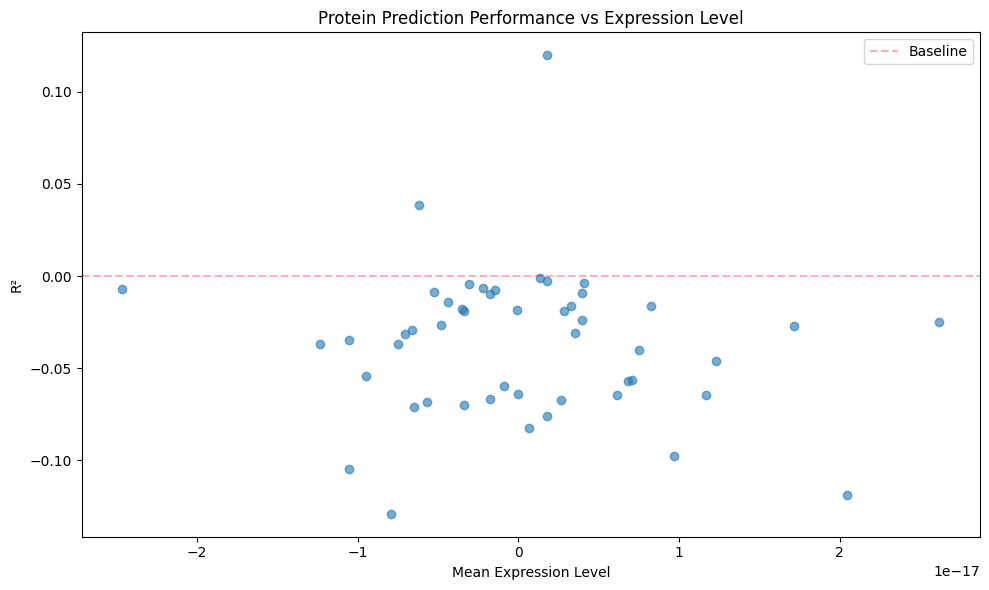


Correlation between mean expression and R²: -0.0991
Config {'lr': 0.0001, 'max_neighbors': 20, 'num_layers': 2} achieved best R2: -0.0247

Testing Config: {'lr': 0.0001, 'max_neighbors': 20, 'num_layers': 3}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: -0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=20) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.0700
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.1003
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.1029
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.1164
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.1244
  CD34 - vasculature:Cyc_20_ch_3                     R²: -0.1523
  HLA-DR - MHC-II:Cyc_5_ch_2                         R

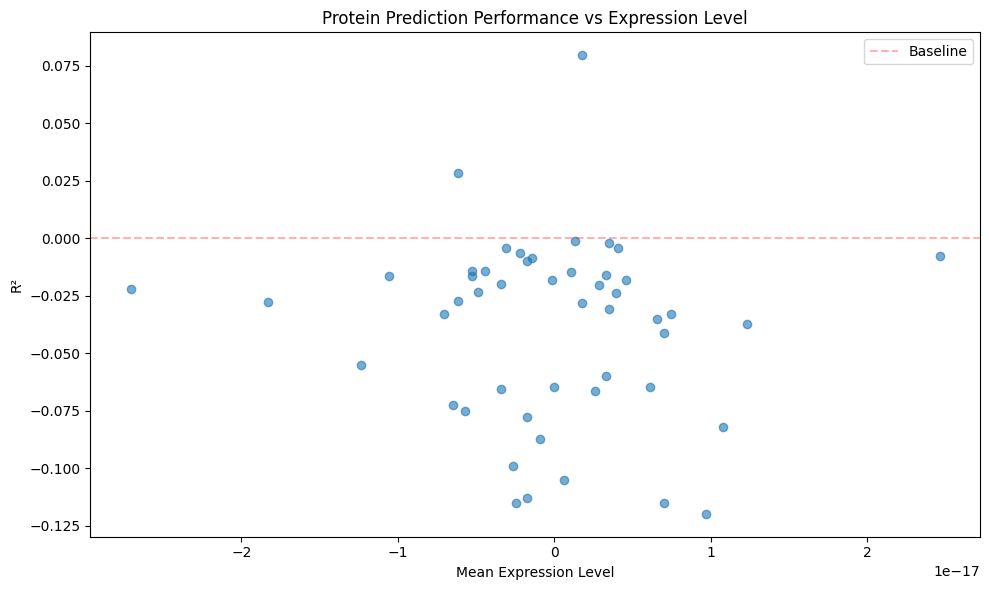


Correlation between mean expression and R²: -0.0857
Config {'lr': 0.0001, 'max_neighbors': 20, 'num_layers': 3} achieved best R2: -0.0245

Testing Config: {'lr': 0.0001, 'max_neighbors': 20, 'num_layers': 4}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: -0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=20) relationships within train/test splits...
KNN rebuild complete!

Testing neighbor average baseline...

Neighbor Average Baseline - Best Proteins:
  Granzyme B - cytotoxicity:Cyc_13_ch_2              R²: -0.0700
  CD31 - vasculature:Cyc_19_ch_3                     R²: -0.1003
  CD7 - T cells:Cyc_16_ch_3                          R²: -0.1029
  Chromogranin A - neuroendocrine:Cyc_17_ch_2        R²: -0.1164
  CD15 - granulocytes:Cyc_14_ch_2                    R²: -0.1244
  CD34 - vasculature:Cyc_20_ch_3                     R²: -0.1523
  HLA-DR - MHC-II:Cyc_5_ch_2                         R

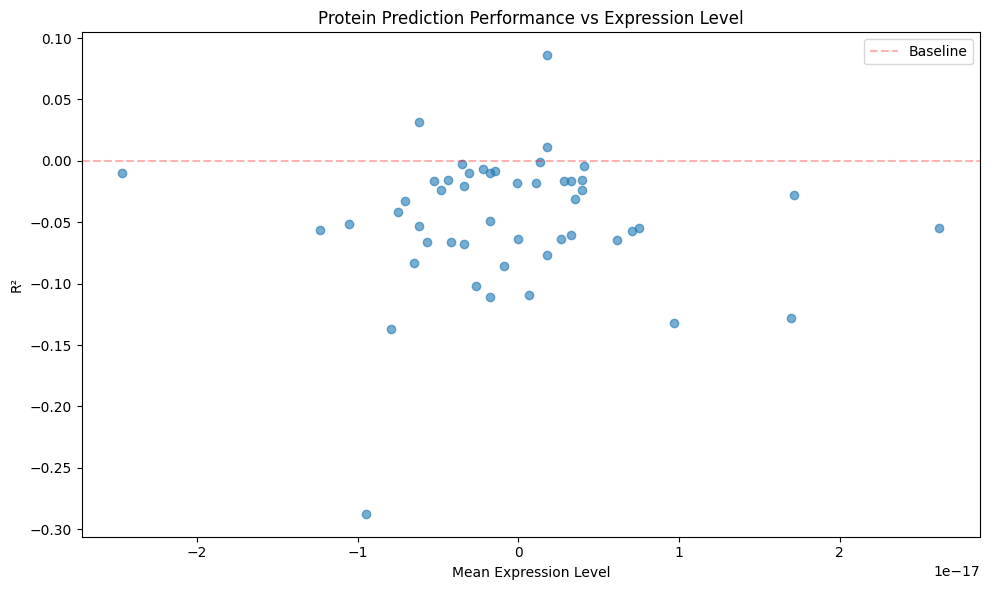


Correlation between mean expression and R²: 0.0010
Config {'lr': 0.0001, 'max_neighbors': 20, 'num_layers': 4} achieved best R2: -0.0304

Testing Config: {'lr': 1e-05, 'max_neighbors': 5, 'num_layers': 2}
Training on 49 protein markers
Normalizing protein expression (z-score per protein)...
After normalization - Mean: -0.0000, Std: 1.0000
Train samples: 204113, Test samples: 54272
Rebuilding KNN (k=5) relationships within train/test splits...


KeyboardInterrupt: 

In [15]:
import itertools

# Level 1 Hyperparameter Grid
hparams = {
    'lr': [1e-4, 1e-5, 1e-6],
    'max_neighbors': [5, 10, 20],
    'num_layers': [2, 3, 4]
}

results = []

keys, values = zip(*hparams.items())
for v in itertools.product(*values):
    params = dict(zip(keys, v))

    print(f"\nTesting Config: {params}")

    # Run a short training burst (e.g., 5-10 epochs) for faster sweeping
    model, train_ds, test_ds = train_graphformer(
        df,
        protein_start_col=START_PROTEIN,
        protein_end_col=END_PROTEIN,
        normalize=True,
        hidden_dim=128,  # Fixed for Level 1
        num_heads=4,     # Fixed for Level 1
        num_epochs=5,   # Shorter training for optimization
        **params
    )

    # Evaluate performance (using final R2 from training function logs or manual retrieval)
    # Note: train_graphformer returns the best model based on R2 internally
    import torch
    checkpoint = torch.load('best_graphformer_model.pt', weights_only=False)
    best_r2_val = checkpoint['r2']

    results.append({**params, 'best_r2': best_r2_val})
    print(f"Config {params} achieved best R2: {best_r2_val:.4f}")

# Display and sort results
results_df = pd.DataFrame(results).sort_values(by='best_r2', ascending=False)
print("\nHyperparameter Optimization Results (Sorted by R2):")
print(results_df)

In [16]:
results_df = pd.DataFrame(results).sort_values(by='best_r2', ascending=False)
print("\nHyperparameter Optimization Results (Sorted by R2):")
print(results_df)


Hyperparameter Optimization Results (Sorted by R2):
       lr  max_neighbors  num_layers   best_r2
4  0.0001             10           3 -0.024453
7  0.0001             20           3 -0.024550
6  0.0001             20           2 -0.024674
0  0.0001              5           2 -0.025266
5  0.0001             10           4 -0.025590
3  0.0001             10           2 -0.026147
2  0.0001              5           4 -0.026441
1  0.0001              5           3 -0.027357
8  0.0001             20           4 -0.030383


In [ ]:
# Assume best L1 from above (e.g. lr=1e-4, k=10, layers=3)
best_l1 = results_df.iloc[0].to_dict()

hparams_l2 = {
    'hidden_dim': [64, 128, 256],
    'batch_size': [32, 64, 128]
}

results_l2 = []
keys, values = zip(*hparams_l2.items())
for v in itertools.product(*values):
    params = dict(zip(keys, v))
    print(f"\nTesting Config L2: {params}")

    model, train_ds, test_ds = train_graphformer(
        df,
        protein_start_col=START_PROTEIN,
        protein_end_col=END_PROTEIN,
        normalize=True,
        num_layers=int(best_l1['num_layers']),
        max_neighbors=int(best_l1['max_neighbors']),
        lr=best_l1['lr'],
        num_heads=4,     # Fixed until Level 3
        num_epochs=15,   # Slightly longer for refinement
        **params
    )

    checkpoint = torch.load('best_graphformer_model.pt', weights_only=False)
    best_r2_val = checkpoint['r2']
    results_l2.append({**params, 'best_r2': best_r2_val})

results_l2_df = pd.DataFrame(results_l2).sort_values(by='best_r2', ascending=False)
print("\nLevel 2 Results:")
print(results_l2_df)

In [ ]:
best_l2 = results_l2_df.iloc[0].to_dict()

hparams_l3 = {
    'num_heads': [4, 8]
}

results_l3 = []
for heads in hparams_l3['num_heads']:
    print(f"\nTesting Config L3: heads={heads}")

    model, train_ds, test_ds = train_graphformer(
        df,
        protein_start_col=START_PROTEIN,
        protein_end_col=END_PROTEIN,
        normalize=True,
        num_layers=int(best_l1['num_layers']),
        max_neighbors=int(best_l1['max_neighbors']),
        lr=best_l1['lr'],
        hidden_dim=int(best_l2['hidden_dim']),
        batch_size=int(best_l2['batch_size']),
        num_heads=heads,
        num_epochs=20
    )

    checkpoint = torch.load('best_graphformer_model.pt', weights_only=False)
    best_r2_val = checkpoint['r2']
    results_l3.append({'num_heads': heads, 'best_r2': best_r2_val})

results_l3_df = pd.DataFrame(results_l3).sort_values(by='best_r2', ascending=False)
print("\nLevel 3 Results:")
print(results_l3_df)